In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

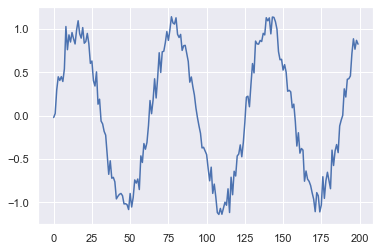

In [2]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1 # Create Synthetic Data

plt.plot(series)

In [3]:
T =10

X=[]
Y=[]
for t in range(len(series)-T):
    x=series[t:t+T]
    X.append(x)
    y=series[t+T]
    Y.append(y)
    
X=np.array(X).reshape(-1,T)
Y=np.array(Y)
N = len(X)

print(X.shape,Y.shape)
    

(190, 10) (190,)


In [4]:
# Build Autoregressive Model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(
    loss = 'mse',
    optimizer = Adam(lr=0.1))

# Train RNN

r = model.fit(
    X[:-N//2], Y[:-N//2], epochs = 80, validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 0s 142ms/step - loss: 1.3696 - val_loss: 0.9112
Epoch 2/80
3/3 [==============================] - 0s 30ms/step - loss: 0.9547 - val_loss: 0.6355
Epoch 3/80
3/3 [==============================] - 0s 30ms/step - loss: 0.3916 - val_loss: 0.3211
Epoch 4/80
3/3 [==============================] - 0s 29ms/step - loss: 0.3350 - val_loss: 0.2407
Epoch 5/80
3/3 [==============================] - 0s 31ms/step - loss: 0.1792 - val_loss: 0.0951
Epoch 6/80
3/3 [==============================] - 0s 33ms/step - loss: 0.0766 - val_loss: 0.1465
Epoch 7/80
3/3 [==============================] - 0s 33ms/step - loss: 0.1038 - val_loss: 0.0613
Epoch 8/80
3/3 [==============================] - 0s 33ms/step - loss: 0.0465 - val_loss: 0.1027
Epoch 9/80
3/3 [==============================] - 0s 40ms/step - loss: 0.0910 - val_loss: 0.1280
Epoch 10/80
3/3 [==============================] - 0s 33ms/step - loss: 0.0756 - val_loss: 0.0747
Epoch 11/80
3/3 [===========

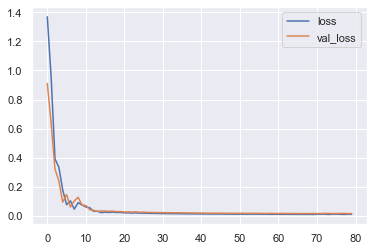

In [5]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [7]:
#Forecast Future Values
validation_target = Y[-N//2:]
validation_predictions =[]
#last train input
last_x = X[-N//2]

while(len(validation_predictions)) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1))[0,0] # 1x1 array
    
    #update predictions
    validation_predictions.append(p)

    #Make new input
    last_x = np.roll(last_x,-1)
    last_x[-1] = p

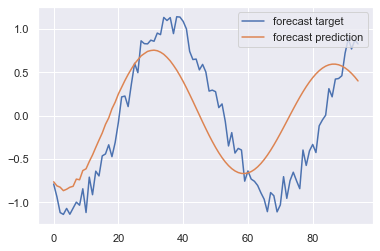

In [8]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions,label = 'forecast prediction')
plt.legend()